In [1]:
# Basic libraries
# !pip install nltk
# !pip install textblob
# !pip install SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Text preprocessing libraries
import re  # For regular expressions
import string  # For handling punctuation
from nltk.corpus import stopwords  # For stopwords
from nltk.tokenize import word_tokenize  # For tokenization
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # For lemmatization
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk  # Natural Language Toolkit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer  # For Bag-of-Words
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF

# Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # Bernoulli Naive Bayes

# Model evaluation
from sklearn.model_selection import train_test_split  # For splitting data into train/test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score # For evaluating model performance

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Optional: For visualizing confusion matrix
sns.set(style="whitegrid")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\priya\Downloads\blogs.csv")
df['Data']

0       Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1       Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2       Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3       Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4       Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
                              ...                        
1995    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997    Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999    Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
Name: Data, Length: 2000, dtype: object

In [3]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

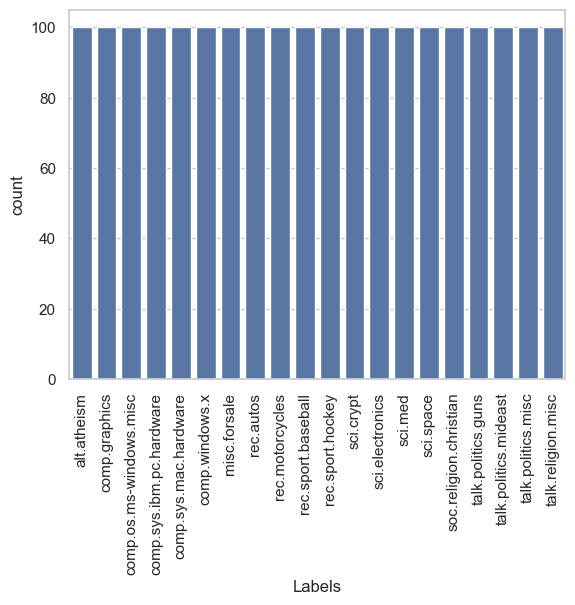

In [4]:
sns.countplot(df,x=df['Labels'])
plt.xticks(rotation=90)
plt.show()

In [5]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [6]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

In [7]:
def worldcl(data,heading):
    txt = ' '.join(df['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

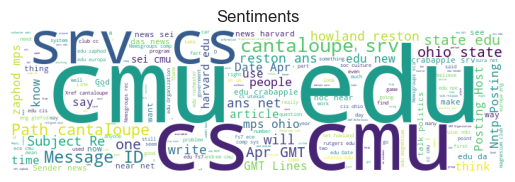

In [8]:
worldcl(df,'Sentiments')

In [14]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Labels'])
y=df['label']

# Text Cleaning

In [10]:
lemma = WordNetLemmatizer()
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [11]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

# TD-IDF

In [12]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

# Model building and Model Evaluation

In [21]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\n Test Accuracy: {nb.score(xtest,ytest)}")

Train Accuracy: 0.985625
 Test Accuracy: 0.82


In [22]:
def worldcl(data,heading):
    txt = ' '.join(df['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

In [23]:
# Initialize the SentimentIntensityAnalyzer for Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment(text):
    sentiment = sia.polarity_scores(text)
    compound = sentiment['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'Data' column and create a new column
df['sentiment'] = df['Data'].apply(calculate_sentiment)

([0, 1, 2],
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

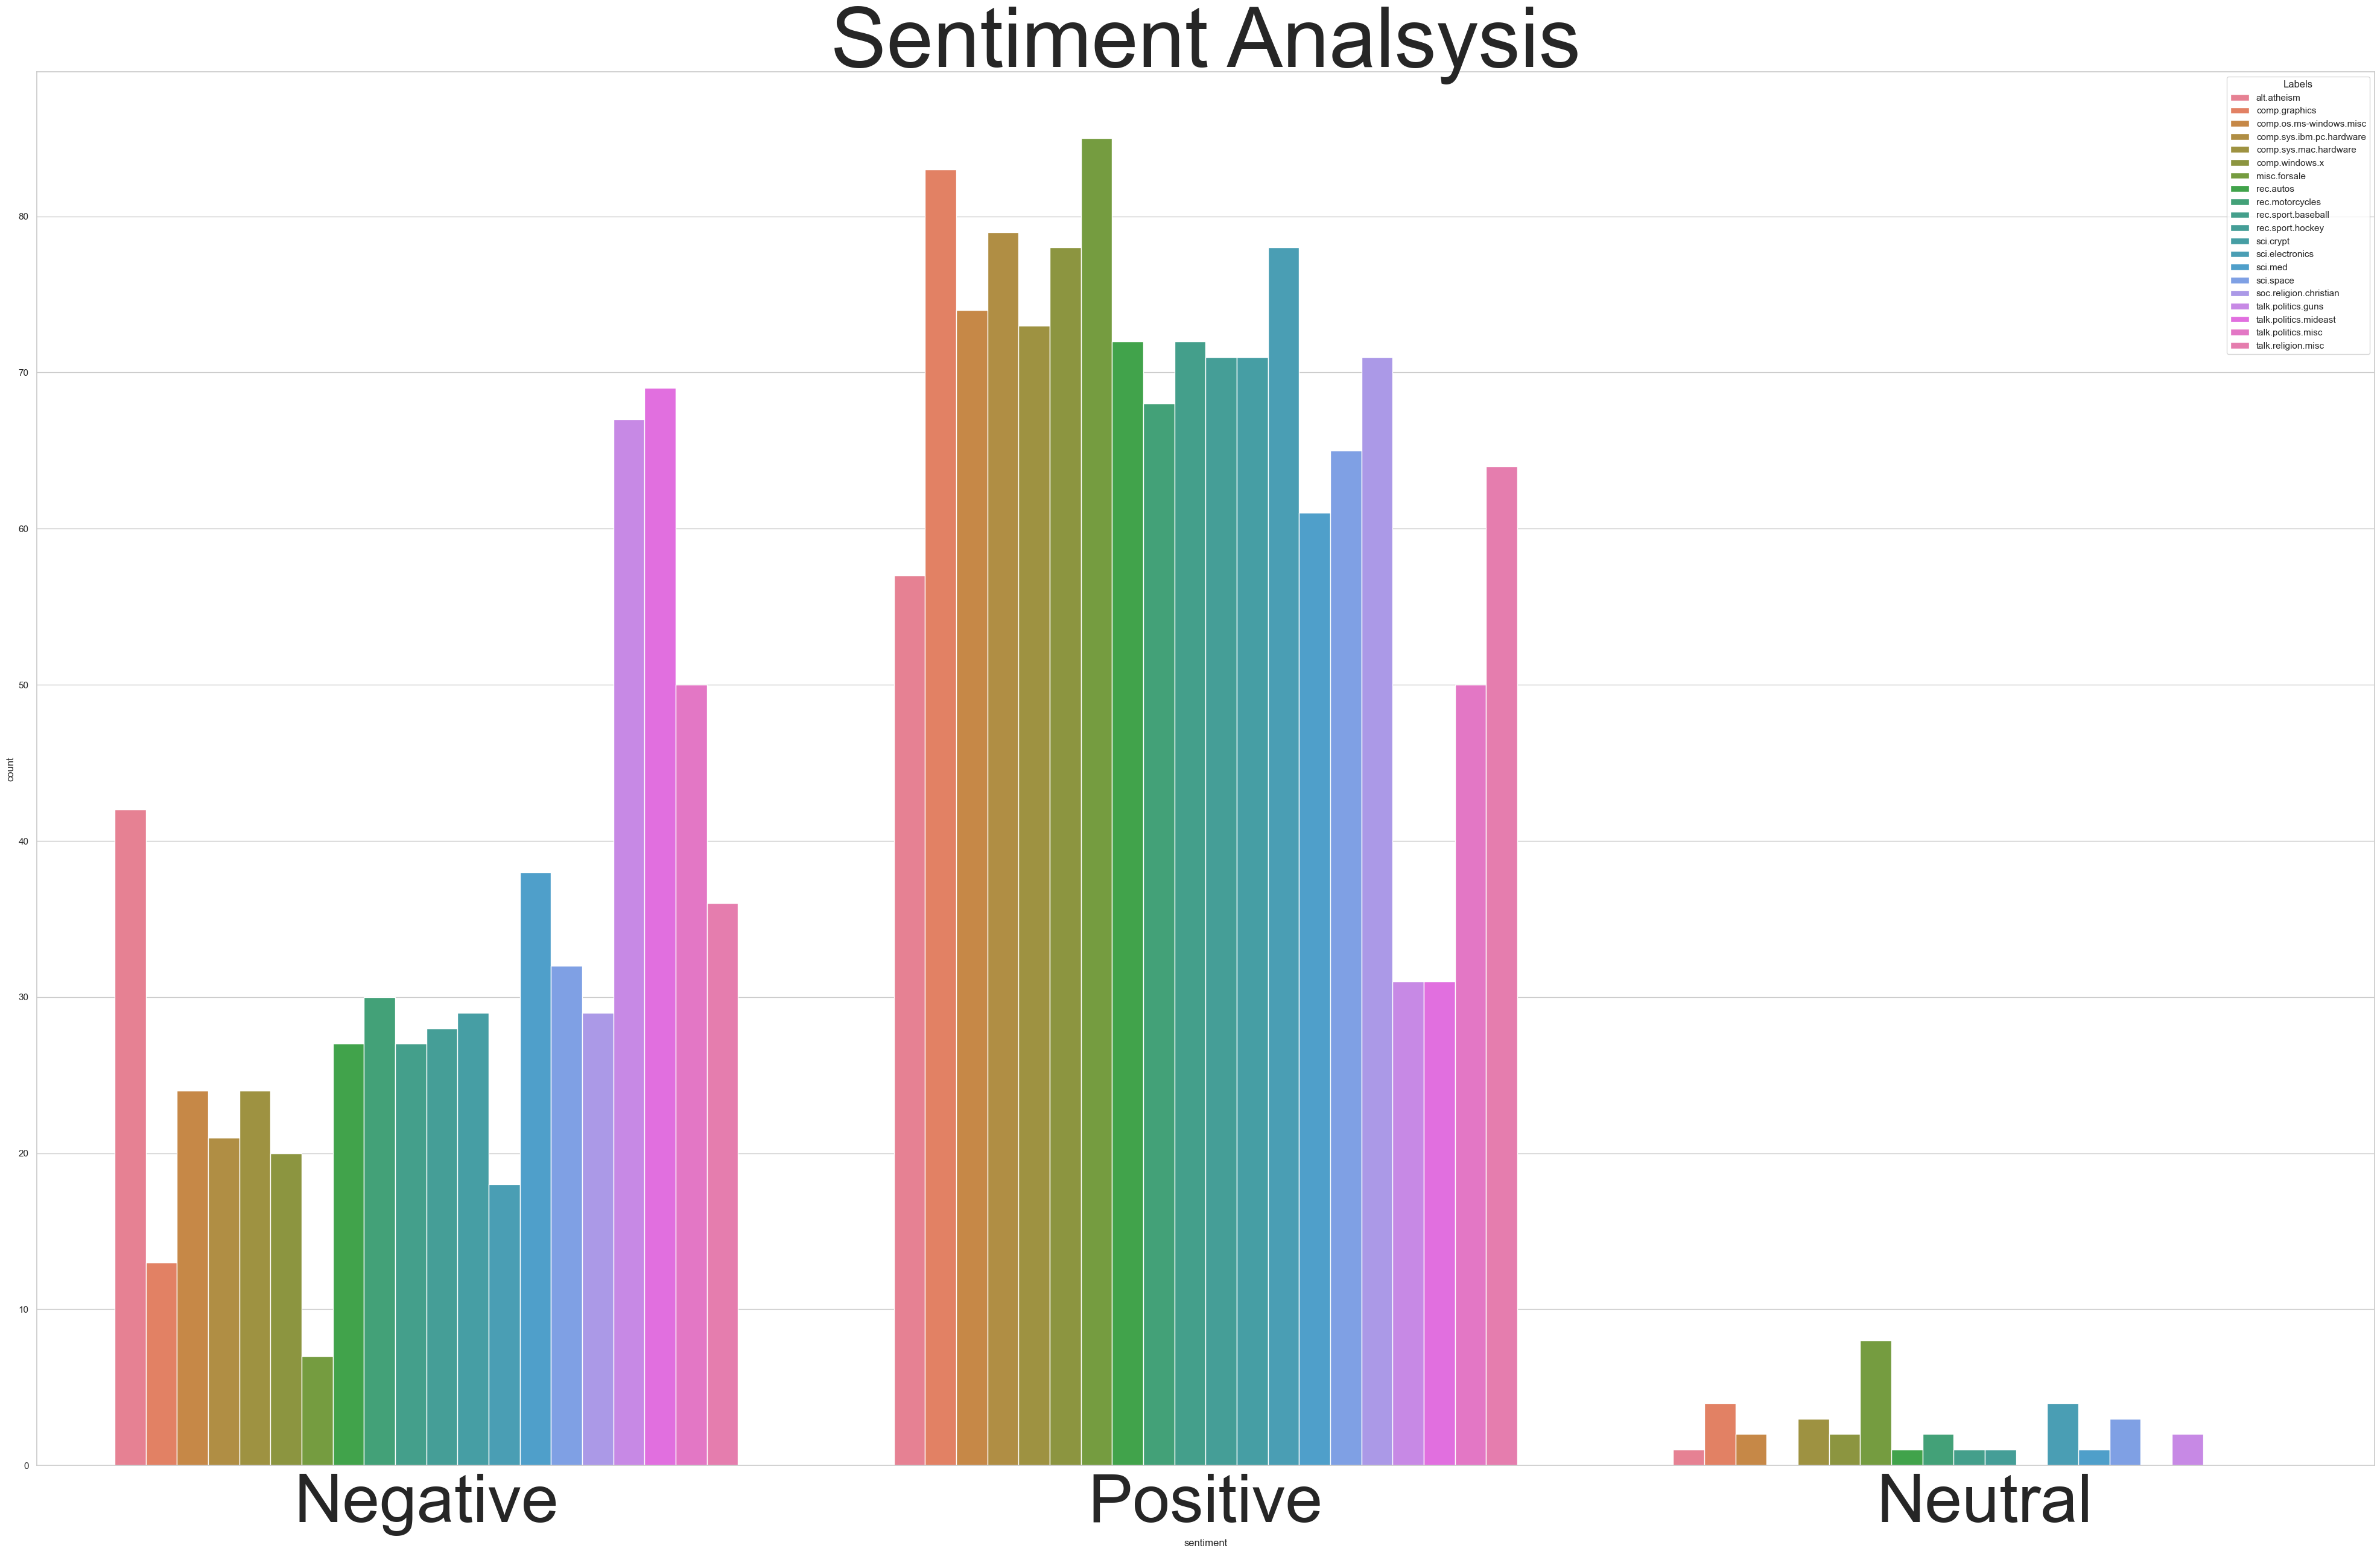

In [26]:
plt.figure(figsize=(50,30))
sns.countplot(data=df,x=df['sentiment'],hue=df['Labels'])
plt.title(label="Sentiment Analsysis",fontsize=100)
plt.xticks(fontsize=80)

In [25]:
print(f'Classification Report :')
print(f'{classification_report(ytest,ypred)}')

Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       1.00      0.64      0.78        22
           2       0.66      1.00      0.79        21
           3       0.82      0.86      0.84        21
           4       0.48      0.93      0.63        14
           5       1.00      0.45      0.62        22
           6       0.83      0.71      0.77        21
           7       0.84      0.89      0.86        18
           8       1.00      0.85      0.92        20
           9       0.95      0.95      0.95        19
          10       0.91      1.00      0.95        21
          11       0.95      0.95      0.95        19
          12       1.00      0.58      0.73        26
          13       0.76      0.87      0.81        15
          14       0.95      0.95      0.95        21
          15       0.86      1.00      0.92        18
          16       0.93      0.86      0.89        29
   